# Women in Data Science Dataset

**Dataset:** Women in Data Science (91,713 encounters)  
**Microskill:** Model Comparison  
**Date:** February 13, 2025  
**Authors:** Jeremy Balch & Mackenzie Meni

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")


# Load data and analyze available columns

In [41]:
data = pd.read_csv('../training_v2.csv')

# Display the first few rows of the dataset
data.head()


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [42]:
# Display the last few rows of the dataset
print(data.columns.tolist())

['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

# Choose the columns of interest

In [43]:
print(data.columns.tolist())

cols_to_keep = [
 # Patient identifiers
 'patient_id',
 
 # Demographics
 'age','gender','ethnicity', 

 # Clinical Information
 'elective_surgery','bmi', 'apache_4a_hospital_death_prob',

 # Medical History
 'aids','cirrhosis','diabetes_mellitus','hepatic_failure', 
 'immunosuppression','leukemia','lymphoma', 'solid_tumor_with_metastasis',
 
 # Hospital Admission
 'readmission_status','hospital_death'
]

# Keep only the columns we are interested in and reassign it to the data variable
data = data[cols_to_keep]

# Display the first few rows of the dataset
data.head()


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [44]:
# Get the unique values in the 'ethnicity' column
ethnicity_values = data['ethnicity'].unique()
print("Unique values in 'ethnicity' column:", ethnicity_values)


Unique values in 'ethnicity' column: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


## Converting age and bmi columns into categorical values

Converting age and BMI into categories helps simplify data analysis and improve model interpretability. It reduces noise, making patterns clearer (e.g., "patients aged 50-59 have higher risk" instead of analyzing every individual age). Categorical bins also work better for certain statistical tests and models like decision trees, and they help handle missing values more effectively.

- Binning age into Decades (0-9, 10-19, ..., 80-89)
- Binning bmi into Ranges (10-14, 15-19, ..., >45)

In [45]:
# Function to convert the age and bmi columns to categorical because 
def convert_age_bmi_to_categorical(data):
  
    
    # Create bins and labels for Age
    age_bins = range(0, 91, 10)  # 0-10, 10-20, ... , 90-100
    age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  # "0-9", "10-19", ...
    
    # Bin Age
    data['age_cat'] = pd.cut(
        data['age'], 
        bins=age_bins, 
        labels=age_labels, 
        right=False
    )
    
    # Create bins and labels for BMI
    bmi_bins = list(range(10, 46, 5)) + [float('inf')]  # 0-5, 5-10, ... , 40-45, >45
    bmi_labels = [f"{i}-{i+4}" for i in range(10, 45, 5)] + ['>45']  # "0-4", "5-9", ..., "40-44", ">45"
    
    # Bin BMI
    data['bmi_cat'] = pd.cut(
        data['bmi'], 
        bins=bmi_bins, 
        labels=bmi_labels, 
        right=False
    )
    # return the modified data
    return data


In [46]:
# Apply the function to the data to convert age and bmi to categorical and display the first few rows
data = convert_age_bmi_to_categorical(data)
data.head()

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death,age_cat,bmi_cat
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,60-69,20-24
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,70-79,25-29
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20-29,30-34
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,80-89,20-24
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10-19,NaN


## Converting categorical variables into numerical one-hot encoded columns

Since machine learning models work best with numbers, pd.get_dummies() converts categorical variables into separate 0/1 columns. This avoids misinterpretation of category relationships and ensures models can properly use features like gender, ethnicity, and age groups without assuming a numerical order.

In [47]:
# converts the categorical columns to one-hot encoded variables
data_dummies = pd.get_dummies(data, columns=['gender', 'ethnicity', 'age_cat', 'bmi_cat'])

# Displays the types of the columns in the data_dummies DataFrame
data_dummies.dtypes

# Displays the shape of the data_dummies DataFrame
data_dummies.shape



(91713, 40)

## Handling NaN Values

In [48]:
# Check for NaN values in the data
nan_values = data_dummies.isna().sum()

# Print the number of NaN values in each column
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 patient_id                          0
age                              4228
elective_surgery                    0
bmi                              3429
apache_4a_hospital_death_prob    7947
aids                              715
cirrhosis                         715
diabetes_mellitus                 715
hepatic_failure                   715
immunosuppression                 715
leukemia                          715
lymphoma                          715
solid_tumor_with_metastasis       715
readmission_status                  0
hospital_death                      0
gender_F                            0
gender_M                            0
ethnicity_African American          0
ethnicity_Asian                     0
ethnicity_Caucasian                 0
ethnicity_Hispanic                  0
ethnicity_Native American           0
ethnicity_Other/Unknown             0
age_cat_0-9                         0
age_cat_10-19                       0
age_cat_20-29         

# Dropping the rows with NaN values and saving the preprocessed data for model exploration later

In [49]:
# Drop rows with NaN values
data_dropnan = data_dummies.dropna()

# Print the number of NaN values in each column after dropping rows with NaN values
print(data_dropnan.isnull().sum())

data_dropnan.shape

# Save the preprocessed data to a CSV file
data_dropnan.to_csv('../preprocessed_data.csv')

patient_id                       0
age                              0
elective_surgery                 0
bmi                              0
apache_4a_hospital_death_prob    0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
readmission_status               0
hospital_death                   0
gender_F                         0
gender_M                         0
ethnicity_African American       0
ethnicity_Asian                  0
ethnicity_Caucasian              0
ethnicity_Hispanic               0
ethnicity_Native American        0
ethnicity_Other/Unknown          0
age_cat_0-9                      0
age_cat_10-19                    0
age_cat_20-29                    0
age_cat_30-39                    0
age_cat_40-49                    0
age_cat_50-59       

# What TableOne Does
* Generates a summary table of key statistics (mean, median, standard deviation, counts, etc.).
* Groups data by categorical variables (e.g., case vs. control, male vs. female).
* Displays p-values to compare groups statistically.
* Formats output for research publications.

In [50]:
# Generate Table One
# Example usage of the tableone library to create Table One

from tableone import TableOne

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9', 'age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24', 'bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44',
    'bmi_cat_>45',

    # Demographics
    'gender_F','gender_M', 'ethnicity_African American','ethnicity_Asian','ethnicity_Caucasian',
    'ethnicity_Hispanic','ethnicity_Native American','ethnicity_Other/Unknown',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma', 
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1 = TableOne(
    data_dropnan, 
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
print(table1)

# Save the table to a location you're exploring in
# table1.to_csv('/path/to/file/save.csv')

                                                    Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                      77575          71052           6523        
age_cat_0-9, n (%)                            False                            77575 (100.0)  71052 (100.0)   6523 (100.0)   1.000
age_cat_10-19, n (%)                          False                             76929 (99.2)   70424 (99.1)    6505 (99.7)  <0.001
                                              True                                 646 (0.8)      628 (0.9)       18 (0.3)        
age_cat_20-29, n (%)                          False                             74177 (95.6)   67756 (95.4)    6421 (98.4)  <0.001
                                              True                                3

## Exploring relationships in our data
A correlation matrix helps identify relationships between categorical variables, revealing redundant features, potential biases, and hidden patterns in the data. This is useful for feature selection, fairness analysis, and improving model performance.

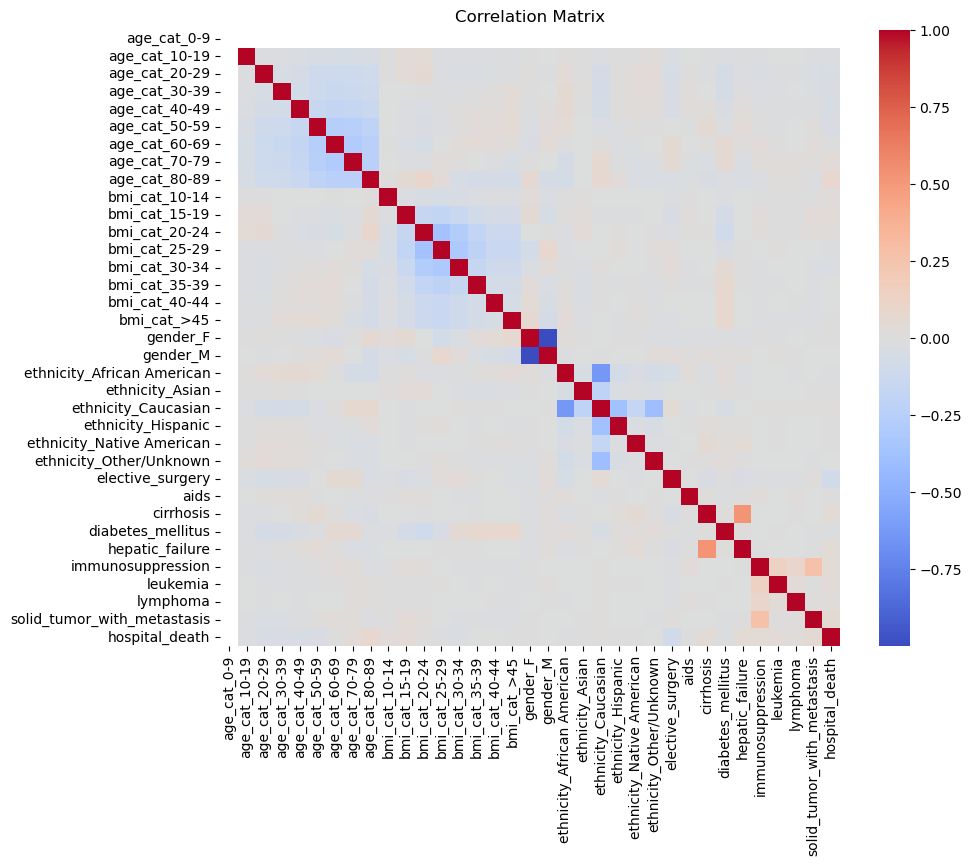

,age_cat_0-9,age_cat_10-19,age_cat_20-29,age_cat_30-39,age_cat_40-49,age_cat_50-59,age_cat_60-69,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,...,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
age_cat_0-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_cat_10-19,NaN,1.000000,-0.019613,-0.022506,-0.029257,-0.043508,-0.050128,-0.049077,-0.040189,0.002617,...,-0.026710,-0.002754,-0.011684,-0.021684,-0.009379,-0.014372,-0.002822,-0.005935,-0.012476,-0.018565
age_cat_20-29,NaN,-0.019613,1.000000,-0.052566,-0.068334,-0.101618,-0.117081,-0.114627,-0.093867,0.007546,...,-0.053838,0.010350,-0.021768,-0.057493,-0.020397,-0.025110,-0.009395,-0.011908,-0.027940,-0.041700
age_cat_30-39,NaN,-0.022506,-0.052566,1.000000,-0.078412,-0.116605,-0.134349,-0.131533,-0.107711,-0.000556,...,-0.043472,0.018568,-0.002483,-0.056124,0.001713,-0.021618,-0.015754,-0.005550,-0.025633,-0.038318
age_cat_40-49,NaN,-0.029257,-0.068334,-0.078412,1.000000,-0.151583,-0.174650,-0.170989,-0.140022,-0.006697,...,-0.037550,0.017077,0.023122,-0.032049,0.017083,-0.010808,-0.012622,-0.011018,-0.012256,-0.043351
age_cat_50-59,NaN,-0.043508,-0.101618,-0.116605,-0.151583,1.000000,-0.259718,-0.254274,-0.208224,-0.003127,...,-0.000757,0.007893,0.048719,-0.008846,0.036340,0.006071,-0.012372,-0.002373,0.015155,-0.036915
age_cat_60-69,NaN,-0.050128,-0.117081,-0.134349,-0.174650,-0.259718,1.000000,-0.292967,-0.239909,0.001153,...,0.052241,-0.007263,0.014440,0.059386,0.011843,0.026404,0.005890,-0.005518,0.024804,0.001504
age_cat_70-79,NaN,-0.049077,-0.114627,-0.131533,-0.170989,-0.254274,-0.292967,1.000000,-0.234880,-0.005375,...,0.054711,-0.015064,-0.030269,0.054920,-0.024143,0.021072,0.015877,0.018626,0.018237,0.037954
age_cat_80-89,NaN,-0.040189,-0.093867,-0.107711,-0.140022,-0.208224,-0.239909,-0.234880,1.000000,0.008837,...,-0.027398,-0.013180,-0.035249,-0.022867,-0.025386,-0.020811,0.014112,0.008007,-0.020567,0.080285
bmi_cat_10-14,NaN,0.002617,0.007546,-0.000556,-0.006697,-0.003127,0.001153,-0.005375,0.008837,1.000000,...,-0.019247,0.003493,-0.002695,-0.021429,-0.005683,0.001365,0.001714,0.003167,0.002172,0.024523


In [51]:

def correlation_matrix(data):
    corr_cols = categorical_vars
    df_corr = data[corr_cols].corr()

    #Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    return df_corr

correlation_matrix(data_dropnan)

## Visualize Mortality per Ethnic Group

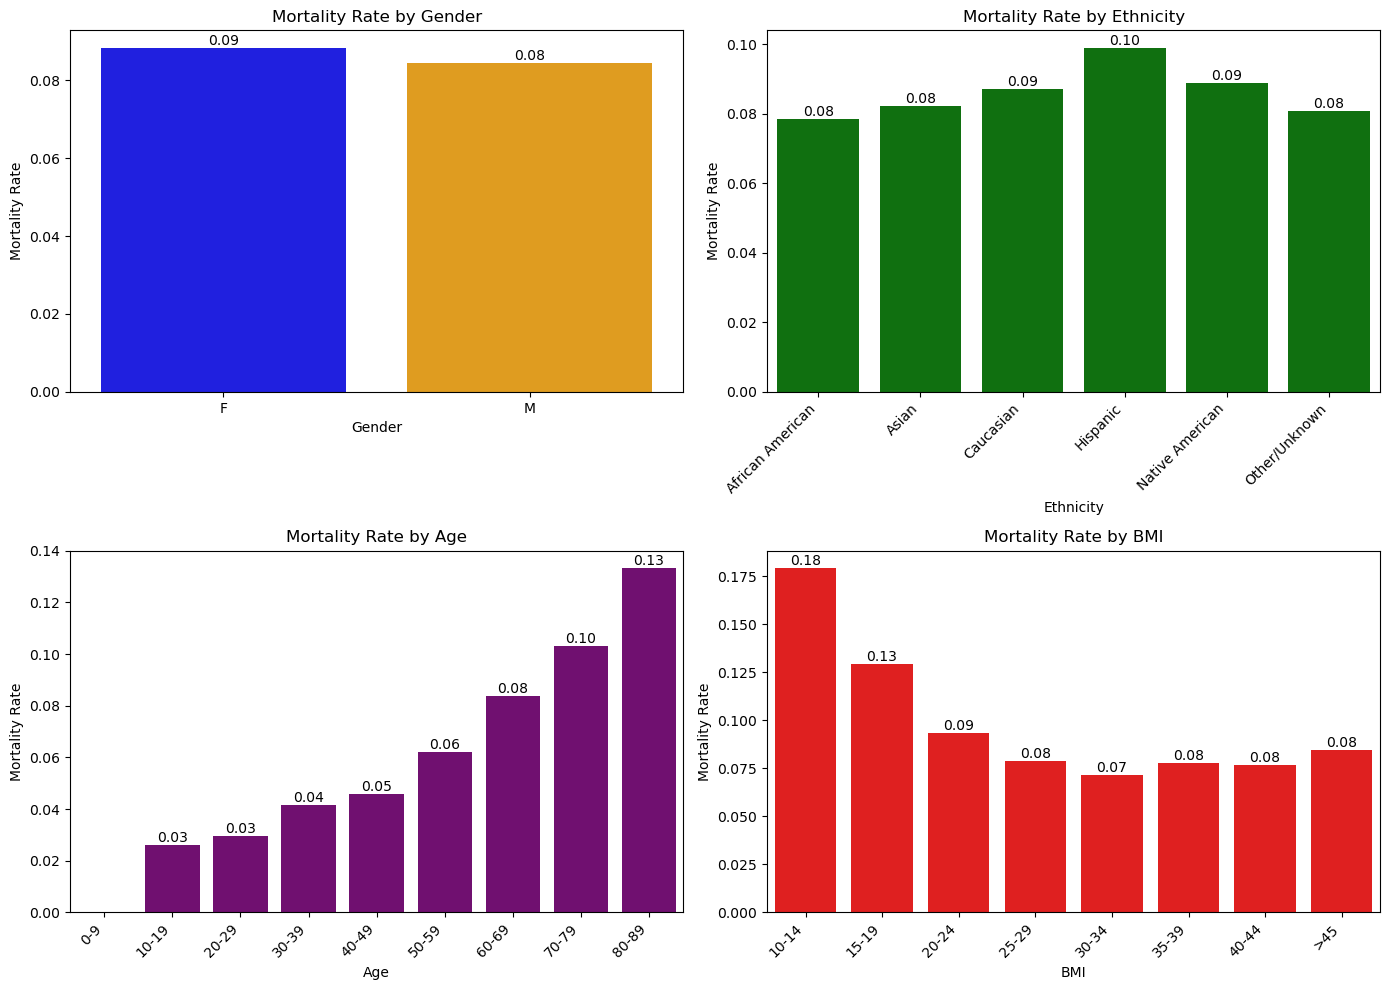

In [52]:

# Calculate mortality rates by gender
gender_mortality = data.groupby('gender')['hospital_death'].mean().reset_index()

# Calculate mortality rates by ethnicity
ethnicity_mortality = data.groupby('ethnicity')['hospital_death'].mean().reset_index()

# Calculate mortality rates by age
age_mortality = data.groupby('age_cat')['hospital_death'].mean().reset_index()

# Calculate mortality rates by bmi
bmi_mortality = data.groupby('bmi_cat')['hospital_death'].mean().reset_index()

# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(14, 10))

# Subplot 1: Mortality by Gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='hospital_death', data=gender_mortality, palette=['blue', 'orange'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)
# Add values on top of the bars
for index, value in enumerate(gender_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 2: Mortality by Ethnicity
plt.subplot(2, 2, 2)
sns.barplot(x='ethnicity', y='hospital_death', data=ethnicity_mortality, color='green')
plt.title('Mortality Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(ethnicity_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 3: Mortality by Age
plt.subplot(2, 2, 3)
sns.barplot(x='age_cat', y='hospital_death', data=age_mortality, color='purple')
plt.title('Mortality Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(age_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 4: Mortality by BMI
plt.subplot(2, 2, 4)
sns.barplot(x='bmi_cat', y='hospital_death', data=bmi_mortality, color='red')
plt.title('Mortality Rate by BMI')
plt.xlabel('BMI')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(bmi_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Change underlying distrbution of patient population


### Modifying Enthnicity

This function randomly modifies the ethnicity distribution in a dataset, ensuring that 20% of individuals are reassigned as 'African American' and the remaining 80% are randomly switched to another ethnicity. This can be used for fairness testing, bias analysis, or controlled experiments on model behavior.

In [53]:
# Create a copy of the data to alter
data_altered = data_dropnan.copy()

# Function to randomly switch 20% individuals to African American
def random_switch_ethnicity_classes_20_percent_african_american(data_altered):
    
    
    # Define the ethnicity columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    # Make a fresh copy so we don't modify the original in place
    data_altered = data_altered.copy()
    
    # Create a zero array of shape [num_rows, num_ethnicity_cols]
    arr = np.zeros((len(data_altered), len(ethnicity_cols)), dtype=int)
    
    # Generate a boolean mask with ~40% True (for African American) and ~60% False (for random other)
    mask = np.random.rand(len(data_altered)) < 0.2
    
    # For rows where mask is True, set ethnicity_African American to 1
    arr[mask, 0] = 1
    
    # For rows where mask is False, choose a random ethnicity index from [1..4]
    other_indices = np.random.randint(1, len(ethnicity_cols), size=(~mask).sum())
    arr[~mask, other_indices] = 1
    
    # Assign back into the DataFrame columns
    data_altered.loc[:, ethnicity_cols] = arr
    
    return data_altered




### Modifying Gender

In [54]:
data_altered = data_dropnan.copy()

def random_switch_gender_classes_80_percent_female(data_altered):
    
    
    # Define the ethnicity columns
    gender_cols = [
        'gender_F',
        'gender_M'
    ]
    
    # Make a fresh copy so we don't modify the original in place
    data_altered = data_altered.copy()
    
    # Create a zero array of shape [num_rows, num_ethnicity_cols]
    arr = np.zeros((len(data_altered), len(gender_cols)), dtype=int)
    
    # Generate a boolean mask with ~80% True (for African American) and ~20% False (for random other)
    mask = np.random.rand(len(data_altered)) < 0.8
    
    # For rows where mask is True, set ethnicity_African American to 1
    arr[mask, 0] = 1
    
    # For rows where mask is False, choose a random ethnicity index from [1..4]
    other_indices = np.random.randint(1, len(gender_cols), size=(~mask).sum())
    arr[~mask, other_indices] = 1
    
    # Assign back into the DataFrame columns
    data_altered.loc[:, gender_cols] = arr
    
    return data_altered




## Creating the strongly biased data sets

In [55]:
# IMPORTANT: Make sure to capture the return value

data_altered_20_percent_african_american = random_switch_ethnicity_classes_20_percent_african_american(data_altered)

data_altered_complete = random_switch_gender_classes_80_percent_female(data_altered_20_percent_african_american)

In [56]:
# Saving the altered data to a CSV file

data_altered_complete.to_csv('../data_altered_complete.csv')


## Visualization of the altered data

### Vizualizing ethnicity

This function visualizes the distribution of ethnicities in a dataset that uses one-hot encoding for ethnicity categories.

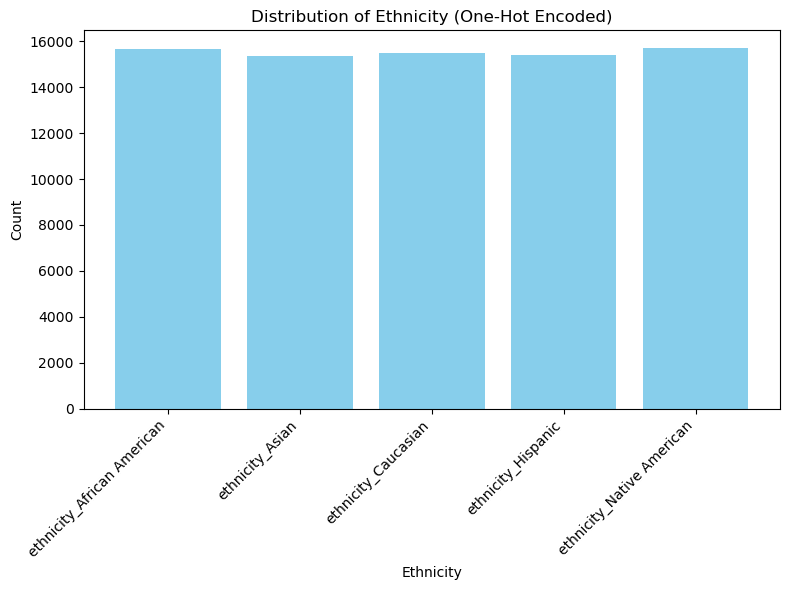

In [57]:
def plot_ethnicity_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """
    

    # Define the ethnicity one-hot columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    ethnicity_counts = data_altered_complete[ethnicity_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(ethnicity_counts.index, ethnicity_counts.values, color='skyblue')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.title('Distribution of Ethnicity (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the ethinicity distribution for the altered data
plot_ethnicity_distribution(data_altered_complete)

### Vizualizing gender

This function visualizes the distribution of gender in a dataset that uses one-hot encoding for gender categories.

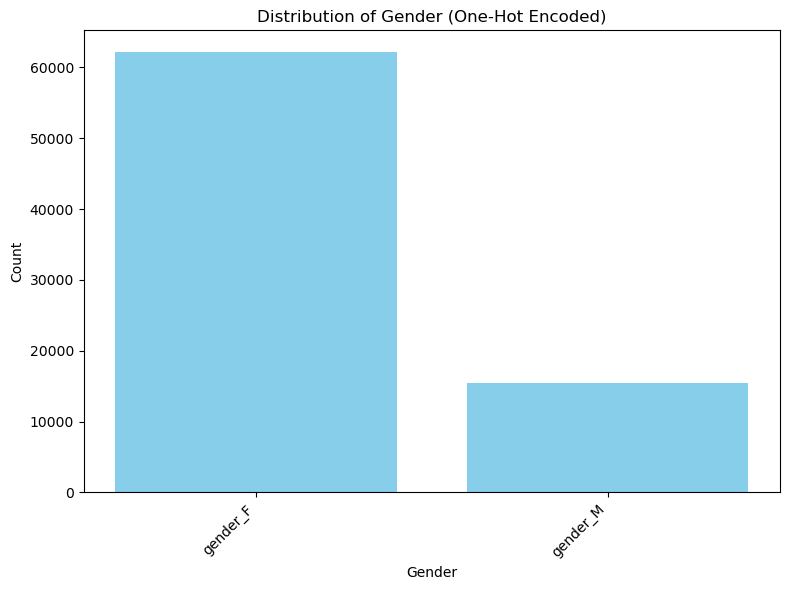

In [58]:
def plot_gender_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """

    # Define the ethnicity one-hot columns
    gender_cols = [
        'gender_F',
        'gender_M'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    gender_counts = data_altered_complete[gender_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Distribution of Gender (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the gender distribution
plot_gender_distribution(data_altered_complete)

In [59]:
# Generate Table One

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9','age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24','bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44','bmi_cat_>45',

    # Demographics
    'gender_F','gender_M','ethnicity_African American','ethnicity_Asian',
    'ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma',
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1_altered = TableOne(
    data_altered_complete,                                  # Choose the specific altered table
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
table1_altered

Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                      77575          71052           6523        
age_cat_0-9, n (%)                            False                            77575 (100.0)  71052 (100.0)   6523 (100.0)   1.000
age_cat_10-19, n (%)                          False                             76929 (99.2)   70424 (99.1)    6505 (99.7)  <0.001
                                              True                                 646 (0.8)      628 (0.9)       18 (0.3)        
age_cat_20-29, n (%)                          False                             74177 (95.6)   67756 (95.4)    6421 (98.4)  <0.001
                                              True                                3398 (4.4)     3296 (4.6)      102 (1.6)        
age_cat_30-39, n (%)                          False                             73162 (94.3)   66819 (94.0)    6343 (97.2)  <0.001
                                              True                                4413 (5.7)     4233 (6.0)      180 (2.8)        
age_cat_40-49, n (%)                          False                             70399 (90.7)   64209 (90.4)    6190 (94.9)  <0.001
                                              True                                7176 (9.3)     6843 (9.6)      333 (5.1)        
age_cat_50-59, n (%)                          False                             63305 (81.6)   57674 (81.2)    5631 (86.3)  <0.001
                                              True                              14270 (18.4)   13378 (18.8)     892 (13.7)        
age_cat_60-69, n (%)                          False                             59708 (77.0)   54701 (77.0)    5007 (76.8)   0.687
                                              True                              17867 (23.0)   16351 (23.0)    1516 (23.2)        
age_cat_70-79, n (%)                          False                             60284 (77.7)   55555 (78.2)    4729 (72.5)  <0.001
                                              True                              17291 (22.3)   15497 (21.8)    1794 (27.5)        
age_cat_80-89, n (%)                          False                             65061 (83.9)   60226 (84.8)    4835 (74.1)  <0.001
                                              True                              12514 (16.1)   10826 (15.2)    1688 (25.9)        
bmi_cat_10-14, n (%)                          False                             77140 (99.4)   70693 (99.5)    6447 (98.8)  <0.001
                                              True                                 435 (0.6)      359 (0.5)       76 (1.2)        
bmi_cat_15-19, n (%)                          False                             71974 (92.8)   66158 (93.1)    5816 (89.2)  <0.001
                                              True                                5601 (7.2)     4894 (6.9)     707 (10.8)        
bmi_cat_20-24, n (%)                          False                             58658 (75.6)   53864 (75.8)    4794 (73.5)  <0.001
                                              True                              18917 (24.4)   17188 (24.2)    1729 (26.5)        
bmi_cat_25-29, n (%)                          False                             54556 (70.3)   49817 (70.1)    4739 (72.7)  <0.001
                                              True                              23019 (29.7)   21235 (29.9)    1784 (27.3)        
bmi_cat_30-34, n (%)                          False                             62783 (80.9)   57301 (80.6)    5482 (84.0)  <0.001
                                              True                              14792 (19.1)   13751 (19.4)    1041 (16.0)        
bmi_cat_35-39, n (%)                          False                             70148 (90.4)   64209 (90.4)    5939 (91.0)